# **Proyek Analisis Data: E-Commerce Public Dataset**
- Nama: Zulian Firmansyah
- Email: zulianfirmasnyahsyah22@gmail.com
- Id Dicoding: Zulian Firmasnyah

## **1. Menentukan Pertanyaan Bisnis**

1. Produk mana yang memiliki volume penjualan tertinggi dan terendah?
2. Di wilayah geografis mana kita memiliki jumlah pelanggan terbanyak?

##**2. Menyiapkan semua library yang dibuthkan**

In [ ]:
!pip install unidecode



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg
import zipfile

##**3. Data Wrangling**

### **3.1 Gathering Data**

Menginstal kaggle API untuk mengakses ke dataset dari Kaggle.

In [ ]:
!pip install kaggle

Menggunakan Google Colab untuk mengunggah file Kaggle JSON yang berisi kredensial API.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Membuat folder Kaggle di direktori pengguna dan memindahkan file JSON Kaggle ke dalamnya. Kemudian, kami memberikan izin akses API Key yang diunggah sebelumnya untuk digunakan.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Menggunakan kaggle CLI untuk mengunduh dataset "Brazilian E-Commerce" dari Kaggle. Dataset secara otomatis disimpan pada direktori saat ini di Google Colab.

In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

 96% 41.0M/42.6M [00:01<00:00, 41.3MB/s]
100% 42.6M/42.6M [00:01<00:00, 36.8MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('brazilian-ecommerce.zip', 'r')
zip_ref.extractall('datasets/')
zip_ref.close()

Kode ini membaca dataset e-commerce Brazil dari file CSV, kemudian menyusunnya dalam bentuk dictionary untuk memudahkan akses dan analisis data.

In [ ]:
# Base Dataset Directory
data_dir = "./datasets/"

# Opening Datasets
customers = pd.read_csv(data_dir + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'olist_geolocation_dataset.csv')
items = pd.read_csv(data_dir + 'olist_order_items_dataset.csv')
payments = pd.read_csv(data_dir + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(data_dir + 'olist_orders_dataset.csv')
products = pd.read_csv(data_dir + 'olist_products_dataset.csv')
sellers = pd.read_csv(data_dir + 'olist_sellers_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'cust': customers,
        'geo': geolocation,
        'ite': items,
        'pay': payments,
        'rev': reviews,
        'ord': orders,
        'prod': products,
        'sell': sellers,
        'cat': category,}

Beberapa cell di bawah ini digunakan untuk melihat representasi data masing-masing dataframe untuk memudahkan proses analisis data nantinya.

In [ ]:
data['cust'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data['ite'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['pay'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['rev'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['ord'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['prod'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['sell'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['cat'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **3.2 Assessing Data**

**Checking Data Types**

Melihat informasi dari setiap DataFrame

In [ ]:
print('\n', data['cust'].info())
print('\n', data['geo'].info())
print('\n', data['ite'].info())
print('\n', data['pay'].info())
print('\n', data['rev'].info())
print('\n', data['ord'].info())
print('\n', data['prod'].info())
print('\n', data['sell'].info())
print('\n', data['cat'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

**Checking data null**

In [ ]:
print('\nInfo data null customers:\n', data['cust'].isnull().sum())
print('\nInfo data null geolocation:\n', data['geo'].isnull().sum())
print('\nInfo data null order items:\n', data['ite'].isnull().sum())
print('\nInfo data null order payments:\n', data['pay'].isnull().sum())
print('\nInfo data null order reviews:\n', data['rev'].isnull().sum())
print('\nInfo data null orders:\n', data['ord'].isnull().sum())
print('\nInfo data null products:\n', data['prod'].isnull().sum())
print('\nInfo data null sellers:\n', data['sell'].isnull().sum())
print('\nInfo data null product category:\n', data['cat'].isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cre

**Check for Duplicates**

In [ ]:
hitung_duplikat = {}
hitung_total_sample = {}

for table_name, table_data in data.items():
    hitung_duplikat[table_name] = table_data.duplicated().sum()
    hitung_total_sample[table_name] = len(table_data)

df_duplikat = pd.DataFrame.from_dict(hitung_duplikat, orient='index', columns=['Jumlah Duplikat'])
df_total_sample = pd.DataFrame.from_dict(hitung_total_sample, orient='index', columns=['Total Jumlah Sampel'])


result_df = pd.concat([df_total_sample, df_duplikat], axis=1)

result_df

,Total Jumlah Sampel,Jumlah Duplikat
cust,99441,0
geo,1000163,261831
ite,112650,0
pay,103886,0
rev,99224,0
ord,99441,0
prod,32951,0
sell,3095,0
cat,71,0


Menampilkan ringkasan statistik dari setiap DataFrame


In [ ]:
print('\nData describe customers:\n', data['cust'].describe(include='all'))
print('\nData describe geolocation:\n', data['geo'].describe(include='all'))
print('\nData describe order items:\n', data['ite'].describe(include='all'))
print('\nData describe order payments:\n', data['pay'].describe(include='all'))
print('\nData describe order reviews:\n', data['rev'].describe(include='all'))
print('\nData describe orders:\n', data['ord'].describe(include='all'))
print('\nData describe product category:\n', data['prod'].describe(include='all'))
print('\nData describe products:\n', data['sell'].describe(include='all'))
print('\nData describe sellers:\n', data['cat'].describe(include='all'))


Data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

In [ ]:
data['geo'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### **3.3 Cleaning Data**

Merubah kolom-kolom tertentu dalam DataFrame 'orders', 'items', dan 'reviews' ke tipe data datetime adalah langkah yang penting untuk memastikan bahwa data tanggal dan waktu dalam dataset telah diubah ke format yang sesuai untuk analisis waktu lebih lanjut.

In [ ]:
def convert_to_datetime(data, columns):
    for column in columns:
        data[column] = pd.to_datetime(data[column])
    return data

datetime_items = ["shipping_limit_date"]
data['ite'] = convert_to_datetime(data['ite'], datetime_items)

datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
data['ord'] = convert_to_datetime(data['ord'], datetime_orders)

datetime_reviews = ["review_creation_date", "review_answer_timestamp"]
data['rev'] = convert_to_datetime(data['rev'], datetime_reviews)

In [ ]:
data['ord'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
data['ite'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
data['rev'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Karena pada Geolocation Dataset ada data yang mempunyai duplikat maka data duplikat tersebut akan kita hapus terlebih dahulu.

In [ ]:
data['geo'].duplicated().sum()

261831

In [ ]:
data['geo'].drop_duplicates(inplace=True)
data['geo'].duplicated().sum()

0

**Cleaning Data Null**

pertama menghitung banyaknya data null di setiap kolom pada masing-masing dataframe dengan rasio persen

In [ ]:

for df_name, df in data.items():
    for col in df.columns:
        null_percentage = (df[col].isnull().sum() / len(df)) * 100
        print(f'{col} (Null): {null_percentage:.2f} %')


customer_id (Null): 0.00 %
customer_unique_id (Null): 0.00 %
customer_zip_code_prefix (Null): 0.00 %
customer_city (Null): 0.00 %
customer_state (Null): 0.00 %
geolocation_zip_code_prefix (Null): 0.00 %
geolocation_lat (Null): 0.00 %
geolocation_lng (Null): 0.00 %
geolocation_city (Null): 0.00 %
geolocation_state (Null): 0.00 %
order_id (Null): 0.00 %
order_item_id (Null): 0.00 %
product_id (Null): 0.00 %
seller_id (Null): 0.00 %
shipping_limit_date (Null): 0.00 %
price (Null): 0.00 %
freight_value (Null): 0.00 %
order_id (Null): 0.00 %
payment_sequential (Null): 0.00 %
payment_type (Null): 0.00 %
payment_installments (Null): 0.00 %
payment_value (Null): 0.00 %
review_id (Null): 0.00 %
order_id (Null): 0.00 %
review_score (Null): 0.00 %
review_comment_title (Null): 88.34 %
review_comment_message (Null): 58.70 %
review_creation_date (Null): 0.00 %
review_answer_timestamp (Null): 0.00 %
order_id (Null): 0.00 %
customer_id (Null): 0.00 %
order_status (Null): 0.00 %
order_purchase_timestam

**Meninjau DF**

Karena lebih dari 88% dari kolom **review_comment_title** memiliki nilai null, saya akan menghapus kolom tersebut. Sedangkan, sekitar 58% dari kolom **review_comment_message** memiliki nilai null. Meskipun demikian, saya akan mengganti nilai null dalam kolom ini dengan string **"Nothing"** untuk jaga-jaga jika kemudian hari data tersebut dibutuhkan.

In [ ]:
data['rev'].drop('review_comment_title', axis= 1, inplace= True)
data['rev']['review_comment_message'].fillna('Nothing', inplace=True)

In [ ]:
data['rev'].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

### Explore customers_df

In [ ]:
data['cust'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
255,cad72c6ad6d5b6d95ce0056e1e7948a8,20bb1d9431264f331e47b2da94991eaf,84500,irati,PR
64272,6d682f511e7be36a300a8ab20d1053c3,7edd5a6626e4ef03e8549ddf93398b15,74140,goiania,GO
11722,e2fe3fe92da7cfb1115664a4f48446b9,0d02eb399c6520fbf8f938611878578c,41635,salvador,BA
7521,7f72f62adb974dc47f0139f5c09b1243,913f9de018faaa8124e1162c01797f0f,5360,sao paulo,SP
50149,0e8b055d3ccba0579aec511d1077dab3,fdef92427c2c3a9449eca2d6667d44d7,55560,barreiros,PE


In [ ]:
data['cust'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
city_customer_counts = data['cust'].groupby(by="customer_city").size().sort_values(ascending=False)
state_customer_counts = data['cust'].groupby(by="customer_state").size().sort_values(ascending=False)
print("City-wise customer counts:")
print(city_customer_counts)
print("\nState-wise customer counts:")
print(state_customer_counts)


City-wise customer counts:
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Length: 4119, dtype: int64

State-wise customer counts:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
dtype: int64


### Explore orders_df

In [ ]:
data['ord'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
14582,b92fc3d1e14e2ff2051230fda1012db2,db24cde3f582d45c6be2809ff57d6598,delivered,2017-08-21 13:56:53,2017-08-21 14:10:22,2017-08-23 13:38:06,2017-08-24 18:09:08,2017-09-06 00:00:00
8640,37b1281795f5155c913abe0c05f43b4a,8fbd5b048cd28151d592f67319423ae8,delivered,2018-04-02 20:19:13,2018-04-02 20:30:39,2018-04-03 19:51:40,2018-05-04 17:08:46,2018-04-30 00:00:00
69057,2c316630a424abef517f1f8d7295d666,9b2edc09b7b984bc7166ca79d4b7b864,delivered,2018-08-23 09:27:52,2018-08-23 09:45:07,2018-08-24 11:41:00,2018-08-29 16:07:28,2018-09-10 00:00:00
30195,e6bae50af8e5b4880276314fd3ef0673,a64e1160112c85d4be9b1ff550626db9,delivered,2018-02-05 22:11:16,2018-02-05 22:30:13,2018-02-07 20:33:45,2018-02-08 18:42:45,2018-03-01 00:00:00
49453,e1cce1b92d11a7a2edd0cbcb4de05aa5,a1afc1a6763024c94654daff0d4f4040,delivered,2017-07-04 23:59:54,2017-07-06 03:23:40,2017-07-06 11:57:41,2017-07-18 10:57:42,2017-08-02 00:00:00


### Explore Products-Category & Items
Saya ingin menggabungkan DataFrame 'products' dengan DataFrame 'category' berdasarkan kolom 'product_category_name', sehingga saya dapat memiliki DataFrame baru yang bernama 'product_df'. DataFrame ini akan mencakup informasi tentang kategori produk bersama dengan data produk itu sendiri. Dengan menggabungkan kedua DataFrame ini, saya dapat menyederhanakan analisis dan memahami hubungan antara kategori produk dan produk itu sendiri dalam satu set data yang komprehensif.

In [ ]:
product_df = pd.merge(data['prod'], data['cat'], how="left", on="product_category_name")
product_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


saya ingin menggabungkan DataFrame 'product_df', yang sudah berisi informasi tentang produk dan kategori, dengan DataFrame 'items' berdasarkan kolom 'product_id'. Tujuannya adalah untuk membuat DataFrame baru yang mencakup informasi tentang produk beserta detail itemnya. Dengan menggabungkan kedua DataFrame ini, saya akan memiliki data yang lengkap tentang setiap produk bersama dengan detail itemnya dalam satu dataset yang komprehensif.

In [ ]:
products_items_df = pd.merge(product_df, data['ite'], how="left", on="product_id")
products_items_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


### Explore geolocation_df

In [ ]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
521097,28895,-22.506122,-41.923391,rio das ostras,RJ
927866,89249,-26.073121,-48.610473,itapoa,SC
510674,27913,-22.380012,-41.775201,macae,RJ
346318,15057,-20.795290,-49.333445,sao jose do rio preto,SP
610663,36060,-21.734284,-43.330133,juiz de fora,MG


### Explore items_df

In [ ]:
data['ite'].sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
45180,66ad5fe73a0c03a1d689ebd75dd74ebd,1,772453e71330bbe06de41e9baf8495ac,6560211a19b47992c3666cc44a7e94c0,2017-12-19 22:35:30,95.00,15.42
27819,3f4f6a378519479cb0afe338427c6713,1,fb5ba6890aa3a43eb655c59feb56f68c,ea8482cd71df3c1969d7b9473ff13abc,2018-04-19 15:15:22,27.99,15.23
40337,5bd5cb539a3f28ce071d1b269f342f0b,2,703d742887bb9267f89b675608ba7aa0,640e21a7d01df7614a3b4923e990d40c,2018-05-10 19:50:47,56.10,19.36
89255,cabad88da7829d30f53a581fffcd6eeb,1,d95cb21837d0498ccfa0943b03808f79,b4a476fbd28de64b1e347abf9089366a,2017-05-04 20:22:55,52.50,11.76
71881,a3fa2b20c0df9c8279c4441905471140,1,bc2d6310e5cbd60facb2f9c8d9471597,dc317f341ab0e22f39acbd9dbf9b4a1f,2017-08-10 15:50:20,629.00,40.42


### Explore sellers_df

In [ ]:
data['sell'].sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1516,4e42581f08e8cfc7c090f930bac4552a,13660,portoferreira,SP
2304,a7f13822ceb966b076af67121f87b063,8577,itaquaquecetuba,SP
2604,ce20a2ec1514c25e16f2b5b39bc818f0,5186,sao paulo,SP
1639,417a1e6c7321084d2a0ae0d023cfad93,95885,imigrante,RS
2016,3a1a1fec38dd360f15fc912e821e169d,2451,sao paulo,SP


#### Merge order_items & sellers_df

In [ ]:
item_seller_df = pd.merge(
    left=order_items,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Merge items_df & seller_df
menggabungkan dua DataFrame, yaitu 'items' dan 'sellers', berdasarkan kolom 'seller_id'. DataFrame kiri yang digunakan untuk penggabungan adalah 'items', sedangkan DataFrame kanan adalah 'sellers'. Setelah penggabungan, items_sellers_df.head() digunakan untuk mencetak lima baris pertama dari DataFrame baru yang dihasilkan, untuk memberikan gambaran singkat tentang hasilnya.

In [ ]:
items_sellers_df = pd.merge(data['ite'], data['sell'], how='left', on='seller_id')
items_sellers_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Merge item_seller_df & product_df

In [ ]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [ ]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore payments_df & review_df
Saya ingin menggabungkan dua DataFrame, yaitu 'payments' dan 'reviews', berdasarkan kolom 'order_id'. Tujuannya adalah untuk menyatukan informasi pembayaran dan ulasan produk dalam satu dataset. Dengan melakukan ini, saya dapat menganalisis hubungan antara metode pembayaran yang digunakan dan skor ulasan pelanggan untuk setiap pesanan.

In [ ]:
payments_reviews_df = pd.merge(data['pay'], data['rev'], how='left', on='order_id')
payments_reviews_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Nothing,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Nothing,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Nothing,2017-12-21 00:00:00,2017-12-22 01:10:39


In [ ]:
payments_reviews_df['payment_type'].value_counts()

payment_type
credit_card    77198
boleto         19910
voucher         5830
debit_card      1536
not_defined        3
Name: count, dtype: int64

### Menggabungkan semua dataframe

In [ ]:
from functools import reduce

# List DataFrame yang akan digabungkan
dfs = [data['cust'], data['ord'], data['pay'], data['rev'], data['ite'], data['sell'], data['prod'], data['cat']]

# Menggabungkan semua DataFrame menjadi satu
all_df = reduce(lambda left, right: pd.merge(left, right, on=left.columns.intersection(right.columns).tolist(), how='left'), dfs)

all_df.head()



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,SP,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,SP,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,SP,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [ ]:
# Simpan ke dalam file CSV
all_df.to_csv("all_df.csv", index=False)

## 5. Visualization & Explanatory Analysis

### Pertanyaan 1 : Produk apa yang paling banyak dan paling sedikit terjual?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jumlah semua produk terjual
purchased_products = products_items_df['product_category_name_english'].value_counts()

# Produk dengan jumlah pembelian paling banyak
most_purchased = purchased_products.idxmax()
most_purchased_count = purchased_products.max()

# Produk dengan jumlah pembelian paling sedikit
least_purchased = purchased_products.idxmin()
least_purchased_count = purchased_products.min()

# Data untuk plot pembelian terbanyak
top_products = purchased_products.head(6)  # Ambil 12 produk teratas untuk plot

# Data untuk plot pembelian tersedikit
least_purchased_data = products_items_df[products_items_df['product_category_name_english'].isin(purchased_products.nsmallest(6).index)]
least_purchased_data_counts = least_purchased_data['product_category_name_english'].value_counts()
# Mengurutkan data berdasarkan jumlah pembelian
least_purchased_data_counts = least_purchased_data_counts.sort_values()

<ipython-input-44-437df5bf1868>:5: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.index, palette=palette, ax=axes[0], legend=False)
<ipython-input-44-437df5bf1868>:11: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x=least_purchased_data_counts.index, y=least_purchased_data_counts.values, hue=least_purchased_data_counts.index, palette=palette, ax=axes[1], legend=False)


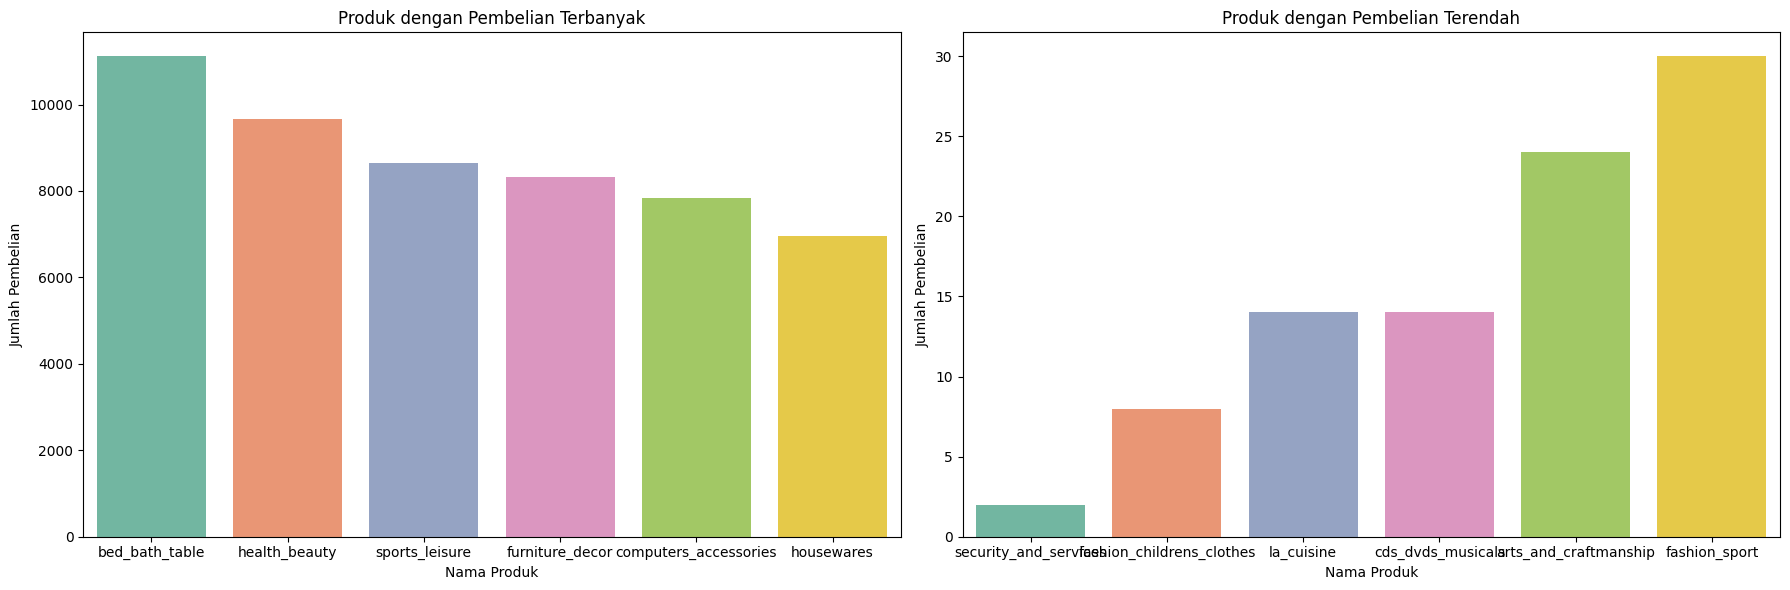

In [ ]:
# Plot produk dengan pembelian terbanyak dan terendah secara bersebelahan
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar plot untuk produk terbanyak
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.index, palette=palette, ax=axes[0], legend=False)
axes[0].set_title('Produk dengan Pembelian Terbanyak')
axes[0].set_xlabel('Nama Produk')
axes[0].set_ylabel('Jumlah Pembelian')

# Bar plot untuk produk tersedikit
sns.barplot(x=least_purchased_data_counts.index, y=least_purchased_data_counts.values, hue=least_purchased_data_counts.index, palette=palette, ax=axes[1], legend=False)
axes[1].set_title('Produk dengan Pembelian Terendah')
axes[1].set_xlabel('Nama Produk')
axes[1].set_ylabel('Jumlah Pembelian')

plt.tight_layout()
plt.show()


> Terlihat pada grafik diatas, Produk yang paling banya terjual adalah bed_bath_table atau yang biasa kita sebut kebutuhan rumah tangga. Sedangkan produk dengan jumlah pembelian terendah adalah "security_and_services" atau produk untuk kemanan dan manajemen resiko yaitu dengan hanya 2 pembelian.


### Pertanyaan 2 : Di wilayah geografis mana kita memiliki jumlah pelanggan terbanyak?

In [ ]:

import pandas as pd

# Menghitung jumlah state yang memiliki zip code prefix lebih dari satu
other_state_geo_count = data['geo'].groupby('geolocation_zip_code_prefix')['geolocation_state'].nunique().reset_index(name='count')
zip_codes_multiple_states = other_state_geo_count[other_state_geo_count['count'] >= 2]

# Mencari state dengan zip code prefix terbanyak
max_state = data['geo'].drop_duplicates(subset='geolocation_zip_code_prefix').groupby('geolocation_zip_code_prefix')['geolocation_state'].first().reset_index()

# Membuat DataFrame untuk geolokasi dengan median lat-lng dan hanya untuk zip codes dengan multiple states
geo_silver = data['geo'].groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()
geo_silver = geo_silver.merge(max_state, on='geolocation_zip_code_prefix', how='inner')

# Menggabungkan dengan data pelanggan
customers_silver = data['cust'].merge(geo_silver, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Menyimpan hasil ke file CSV
customers_silver.to_csv("./datasets/geolocation_silver.csv", index=False)


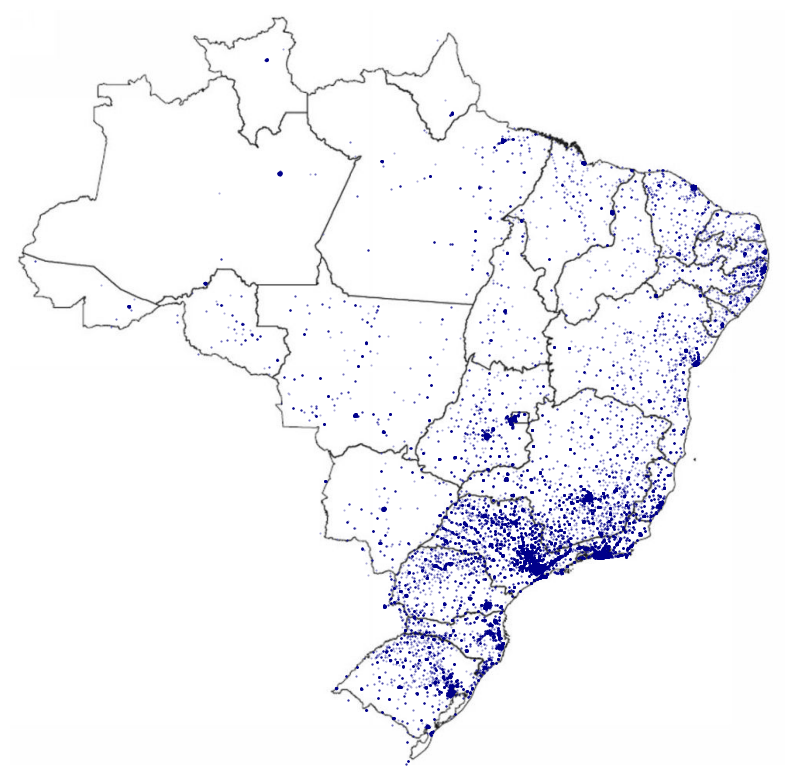

In [ ]:
# Fungsi untuk membuat plot peta Brazil
def plot_brazil_map(data):
    brazil_map_image = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=0.3, c='#00008B')
    plt.axis('off')
    plt.imshow(brazil_map_image, extent=[-73.98283055, -33.8, -33.75116944, 5.4])
    plt.show()

# Menjalankan fungsi untuk membuat plot peta Brazil
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Banyak pelanggan yang berasal dari wilayah tenggara dan selatan seperti kota São Paulo, Rio de Janeiro, Porto Alegre, dan sebagainya.

## Conclusion

1. Produk apa yang paling banyak dan paling sedikit terjual?   
> Terlihat pada grafik diatas, Produk yang paling banya terjual adalah bed_bath_table atau yang biasa kita sebut kebutuhan rumah tangga. Sedangkan produk dengan jumlah pembelian terendah adalah "security_and_services" atau produk untuk kemanan dan manajemen resiko yaitu dengan hanya 2 pembelian
2. Di wilayah geografis mana kita memiliki jumlah pelanggan terbanyak?
> Grafik menunjukkan bahwa jumlah pelanggan lebih tinggi di wilayah tenggara dan selatan. Selain itu, terdapat lebih banyak pelanggan di kota-kota yang merupakan ibu kota, seperti São Paulo, Rio de Janeiro, Porto Alegre, dan sebagainya. Jadi intinya aktivitas pelanggan lebih tinggi di wilayah-wilayah tersebut